# GC plot of SCT libs

Line plot of average GC% distribution of each SCT lib

files referenced (and sampled) below were lists of GC prop for each read (tallied using awk one liner)

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


sns.set(style="darkgrid")
sns.set_context("paper")

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
def reservoir_sample(filename, n=10000):
    sample = []
    with open(filename) as fh:
        for i, line in enumerate(fh):
            if i < n:
                sample.append(float(line))
            else:
                j = random.randint(0, n)
                if j < n:
                    sample[j] = float(line)
    return sample

In [3]:
def seek_sample(filename, n=10000):
    sample = []
    with open(filename, 'rb') as fh:
        fh.seek(0, 2)
        filesize = fh.tell()
        
        random_set = np.sort(np.random.randint(filesize, size=n))
    
        for loc in random_set:
            fh.seek(loc)
            fh.readline()
            sample.append(float(fh.readline()))

    return np.array(sample)

In [ ]:
%timeit -n1 a=reservoir_sample("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")

In [ ]:
%timeit -n100 b=seek_sample("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")

In [63]:
d2_2=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
d2_3=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_3_TTAGGC_L002_R1_001.fastq")
d2_6=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_6_CTTGTA_L002_R1_001.fastq")
d2_7=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_7_GATCAG_L002_R1_001.fastq")
d2_8=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_8_TAGCTT_L002_R1_001.fastq")
d1_2=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_2_TAGCTT_L001_R1_001.fastq")
d1_3=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_3_GGCTAC_L001_R1_001.fastq")
d1_5=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_5_CTTGTA_L001_R1_001.fastq")
l1_9=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_9_ATGTCA_L001_R1_001.fastq")
l1_10=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_10_CCGTCC_L001_R1_001.fastq")
l1_11=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_11_GTCCGC_L001_R1_001.fastq")
b1=seek_sample('bulk1_r1_gc.txt')
b2=seek_sample('bulk2_r1_gc.txt')

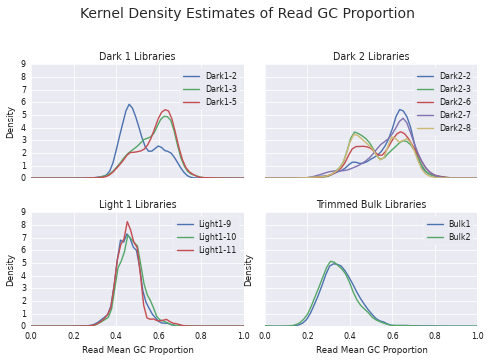

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


sns.set(style="darkgrid")
sns.set_context("paper")

def seek_sample(filename, n=10000):
    sample = []
    with open(filename, 'rb') as fh:
        fh.seek(0, 2)
        filesize = fh.tell()
        
        random_set = np.sort(np.random.randint(filesize, size=n))
    
        for loc in random_set:
            fh.seek(loc)
            fh.readline()
            sample.append(float(fh.readline()))

    return np.array(sample)

d2_2=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
d2_3=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_3_TTAGGC_L002_R1_001.fastq")
d2_6=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_6_CTTGTA_L002_R1_001.fastq")
d2_7=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_7_GATCAG_L002_R1_001.fastq")
d2_8=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_DARK2_8_TAGCTT_L002_R1_001.fastq")
d1_2=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_2_TAGCTT_L001_R1_001.fastq")
d1_3=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_3_GGCTAC_L001_R1_001.fastq")
d1_5=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_dark_5_CTTGTA_L001_R1_001.fastq")
l1_9=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_9_ATGTCA_L001_R1_001.fastq")
l1_10=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_10_CCGTCC_L001_R1_001.fastq")
l1_11=seek_sample("/data/sequencing_projects/single_cell_transcriptomes/Pb_light_11_GTCCGC_L001_R1_001.fastq")
b1=seek_sample('bulk1_r1_gc.txt')
b2=seek_sample('bulk2_r1_gc.txt')


#d2_2=parse_dist("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
fig = plt.figure(figsize=(8,10))
plt.suptitle("Kernel Density Estimates of Read GC Proportion", size=14)
ax1 = fig.add_subplot(421)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax2 = fig.add_subplot(422)
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax4.yaxis.set_major_formatter(plt.NullFormatter())

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)



sns.kdeplot(d1_2, ax=ax1, label='Dark1-2').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Dark 1 Libraries")
sns.kdeplot(d1_3, ax=ax1, label='Dark1-3').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Dark 1 Libraries")
sns.kdeplot(d1_5, ax=ax1, label='Dark1-5').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Dark 1 Libraries")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(frameon=True)

#for i in [d2_2, d2_3, d2_6, d2_7, d2_8]:
#    sns.kdeplot(i, ax=ax2).set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")

sns.kdeplot(d2_2, ax=ax2, label='Dark2-2').set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")
sns.kdeplot(d2_3, ax=ax2, label='Dark2-3').set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")
sns.kdeplot(d2_6, ax=ax2, label='Dark2-6').set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")
sns.kdeplot(d2_7, ax=ax2, label='Dark2-7').set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")
sns.kdeplot(d2_8, ax=ax2, label='Dark2-8').set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(frameon=True)


#for i in [l1_9, l1_10, l1_11]:
#    sns.kdeplot(i, ax=ax3).set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
sns.kdeplot(l1_9, ax=ax3, label="Light1-9").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
sns.kdeplot(l1_10, ax=ax3, label="Light1-10").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
sns.kdeplot(l1_11, ax=ax3, label="Light1-11").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
ax3.legend(frameon=True)


sns.kdeplot(b1, ax=ax4, label="Bulk1").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Trimmed Bulk Libraries")
sns.kdeplot(b2, ax=ax4, label="Bulk2").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Trimmed Bulk Libraries")
ax4.legend(frameon=True)
fig.savefig("raw_lib_gc_prop.svg")

#sns.kdeplot(np.hstack([l1_9, l1_10, l1_11, d1_2, d1_3, d1_5, d2_2, d2_3, d2_6, d2_7, d2_8]), ax=ax4, shade=True).set(ylim=(0, 9), xlim=(0, 1), xlabel="Read Mean GC Proportion", title="All Single Cell Libraries")

###NOTE SCT ARE RAW BULK IS TRIMMED

#plt.savefig("lib_gc_prop.svg")

In [65]:
fig.savefig("raw_lib_gc_prop.svg")

FileNotFoundError: [Errno 2] No such file or directory: '/usr/lib/python3.4/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttf'

### Plot trimmed


In [6]:
## TRImmed

def seek_sample2(filename, n=10000):
    sample = []
    with open(filename, 'rb') as fh:
        sample = np.array([float(x) for x in fh.readlines()])
        
    return sample

d2_2=seek_sample2("/data/sequencing_projects/gc_prop/dark2_2_Q30_R1_paired.fastq_gc_prop.txt")
d2_3=seek_sample2("/data/sequencing_projects/gc_prop/dark2_3_Q30_R1_paired.fastq_gc_prop.txt")
d2_6=seek_sample2("/data/sequencing_projects/gc_prop/dark2_6_Q30_R1_paired.fastq_gc_prop.txt")
d2_7=seek_sample2("/data/sequencing_projects/gc_prop/dark2_7_Q30_R1_paired.fastq_gc_prop.txt")
d2_8=seek_sample2("/data/sequencing_projects/gc_prop/dark2_8_Q30_R1_paired.fastq_gc_prop.txt")

d1_2=seek_sample2("/data/sequencing_projects/gc_prop/dark1_2_Q30_R1_paired.fastq_gc_prop.txt")
d1_3=seek_sample2("/data/sequencing_projects/gc_prop/dark1_3_Q30_R1_paired.fastq_gc_prop.txt")
d1_5=seek_sample2("/data/sequencing_projects/gc_prop/dark1_5_Q30_R1_paired.fastq_gc_prop.txt")

l1_9=seek_sample2("/data/sequencing_projects/gc_prop/light1_9_Q30_R1_paired.fastq_gc_prop.txt")
l1_10=seek_sample2("/data/sequencing_projects/gc_prop/light1_10_Q30_R1_paired.fastq_gc_prop.txt")
l1_11=seek_sample2("/data/sequencing_projects/gc_prop/light1_11_Q30_R1_paired.fastq_gc_prop.txt")


In [40]:
d2_2

array([ 0.523256,  0.666667,  0.413333, ...,  0.68    ,  0.545455,  0.44    ])

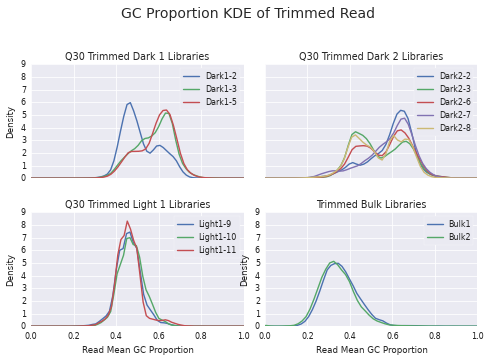

In [51]:
#d2_2=parse_dist("Pb_DARK2_2_ATCACG_L002_R1_001.fastq")
fig = plt.figure(figsize=(8,10))
plt.suptitle("GC Proportion KDE of Trimmed Read", size=14)
ax1 = fig.add_subplot(421)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax2 = fig.add_subplot(422)
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)



sns.kdeplot(d1_2, ax=ax1, label='Dark1-2').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Q30 Trimmed Dark 1 Libraries")
sns.kdeplot(d1_3, ax=ax1, label='Dark1-3').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Q30 Trimmed Dark 1 Libraries")
sns.kdeplot(d1_5, ax=ax1, label='Dark1-5').set(xlim=(0, 1), ylim=(0, 9), ylabel="Density", title="Q30 Trimmed Dark 1 Libraries")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(frameon=True)

#for i in [d2_2, d2_3, d2_6, d2_7, d2_8]:
#    sns.kdeplot(i, ax=ax2).set(xlim=(0, 1), ylim=(0, 9), title="Dark 2 Libraries")

sns.kdeplot(d2_2, ax=ax2, label='Dark2-2').set(xlim=(0, 1), ylim=(0, 9), title="Q30 Trimmed Dark 2 Libraries")
sns.kdeplot(d2_3, ax=ax2, label='Dark2-3').set(xlim=(0, 1), ylim=(0, 9), title="Q30 Trimmed Dark 2 Libraries")
sns.kdeplot(d2_6, ax=ax2, label='Dark2-6').set(xlim=(0, 1), ylim=(0, 9), title="Q30 Trimmed Dark 2 Libraries")
sns.kdeplot(d2_7, ax=ax2, label='Dark2-7').set(xlim=(0, 1), ylim=(0, 9), title="Q30 Trimmed Dark 2 Libraries")
sns.kdeplot(d2_8, ax=ax2, label='Dark2-8').set(xlim=(0, 1), ylim=(0, 9), title="Q30 Trimmed Dark 2 Libraries")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(frameon=True)


#for i in [l1_9, l1_10, l1_11]:
#    sns.kdeplot(i, ax=ax3).set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Light 1 Libraries")
sns.kdeplot(l1_9, ax=ax3, label="Light1-9").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Q30 Trimmed Light 1 Libraries")
sns.kdeplot(l1_10, ax=ax3, label="Light1-10").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Q30 Trimmed Light 1 Libraries")
sns.kdeplot(l1_11, ax=ax3, label="Light1-11").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Q30 Trimmed Light 1 Libraries")
ax3.legend(frameon=True)


sns.kdeplot(b1, ax=ax4, label="Bulk1").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Trimmed Bulk Libraries")
sns.kdeplot(b2, ax=ax4, label="Bulk2").set(xlim=(0, 1), ylim=(0, 9), xlabel="Read Mean GC Proportion",  ylabel="Density", title="Trimmed Bulk Libraries")
ax4.legend(frameon=True)

#sns.kdeplot(np.hstack([l1_9, l1_10, l1_11, d1_2, d1_3, d1_5, d2_2, d2_3, d2_6, d2_7, d2_8]), ax=ax4, shade=True).set(ylim=(0, 9), xlim=(0, 1), xlabel="Read Mean GC Proportion", title="All Single Cell Libraries")

###NOTE SCT ARE RAW BULK IS TRIMMED

plt.savefig("lib_gc_prop_q30_trimmed.svg")

In [53]:
!ls

bulk1_r1.fasta	       lib_gc_prop_q30_trimmed.svg
bulk1_r1_gc.txt        lib_gc_prop.svg
bulk2_r1.fasta	       Taxonomic distribution.ipynb
bulk2_r1_gc.txt        tax_select_sct_q30_sum_file.txt
bulk_sum_file.txt      tax_select_sct_q5_sum_file.txt
bulk_summary.txt       Trimming_plots.ipynb
GC library plot.ipynb


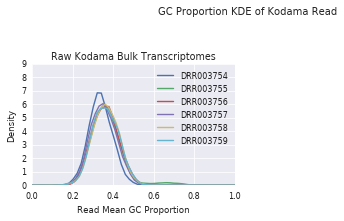

In [7]:
## Kodama GC Prop


d54=seek_sample2("/data/kodama/DRR003754_1.fastq.bz2_gc.txt")
d55=seek_sample2("/data/kodama/DRR003755_1.fastq.bz2_gc.txt")
d56=seek_sample2("/data/kodama/DRR003756_1.fastq.bz2_gc.txt")
d57=seek_sample2("/data/kodama/DRR003757_1.fastq.bz2_gc.txt")
d58=seek_sample2("/data/kodama/DRR003758_1.fastq.bz2_gc.txt")
d59=seek_sample2("/data/kodama/DRR003759_1.fastq.bz2_gc.txt")

fig = plt.figure(figsize=(8,10))
plt.suptitle("GC Proportion KDE of Kodama Read", size=14)
ax1 = fig.add_subplot(421)

for i, j in [(d54, "DRR003754"), (d55, "DRR003755"), (d56,"DRR003756"), (d57,"DRR003757"), (d58, "DRR003758"), (d59, "DRR003759")]:
    sns.kdeplot(i, ax=ax1, label=j).set(xlim=(0, 1), ylim=(0, 9), title="Raw Kodama Bulk Transcriptomes", ylabel="Density", xlabel="Read Mean GC Proportion")

fig.savefig("kodama_gc_prop.svg")

## Conclusions

So the libraries which actually assemble all lack this GC rich peak or have a relatively higher 40-50 GC peak which is where we'd expect 